Using dataset: c:\Users\mackrish_malik\Desktop\clinical-insights-assistant\data\clinical_trial_data.csv
✅ Dataset loaded successfully!
Shape: (6000, 9)

Columns: ['patient_id', 'trial_day', 'dosage_mg', 'compliance_pct', 'adverse_event_flag', 'doctor_notes', 'outcome_score', 'cohort', 'visit_date']

📈 Training regression model to predict outcomes...
✅ Model trained successfully! R² = 0.327 | MAE = 5.321

🔮 Running scenario simulations...


,Dosage Change (%),Compliance Change (%),Predicted ΔOutcome
0,-20,0,-2.94
1,0,0,0.08
2,10,0,1.59
3,0,10,2.81
4,10,10,4.32
5,-10,-10,-4.16


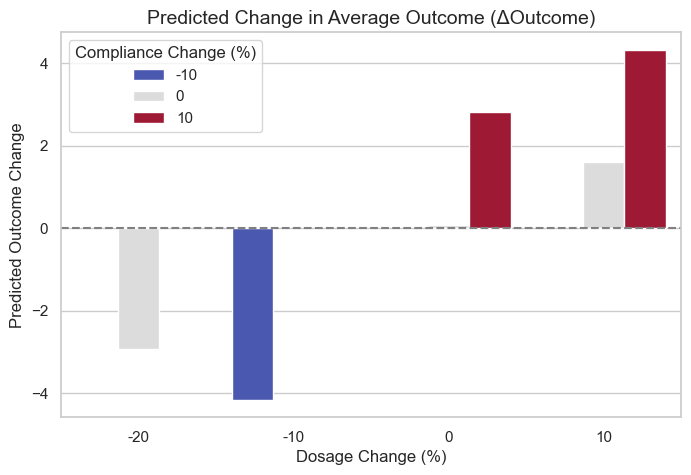


🎯 Example: 10% dosage increase & 5% compliance improvement
✅ Predicted outcome improvement: +2.96

✅ Scenario simulation completed successfully!
Insights generated:
- Regression-based prediction for outcomes
- Sensitivity to dosage and compliance changes
- Visualized scenario impacts


In [1]:
"""
Capstone 3 - Clinical Insights Assistant
Notebook: 04_scenario_simulation.ipynb
--------------------------------------
Simulates clinical scenarios:
- Train regression model on dosage & compliance
- Predict impact on outcomes after dosage/compliance changes
- Visualize outcome deltas (improvements/drops)
"""

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import simulator functions
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../src")))
from scenario_simulation import train_simulation_model, simulate_scenario

# ------------------- CONFIG -------------------
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# ✅ Universal data path
project_root = os.getcwd()
if "notebooks" in project_root:
    DATA_PATH = os.path.abspath(os.path.join(project_root, "../data/clinical_trial_data.csv"))
else:
    DATA_PATH = os.path.abspath(os.path.join(project_root, "data/clinical_trial_data.csv"))

print("Using dataset:", DATA_PATH)

# ------------------- LOAD DATA -------------------
df = pd.read_csv(DATA_PATH, parse_dates=["visit_date"])
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nColumns:", df.columns.tolist())

# ------------------- 1. Train Regression Model -------------------
print("\n📈 Training regression model to predict outcomes...")
metrics = train_simulation_model(df)
print(f"✅ Model trained successfully! R² = {metrics['r2']} | MAE = {metrics['mae']}")

# ------------------- 2. Simulate Scenarios -------------------
print("\n🔮 Running scenario simulations...")

# Define scenario grid
scenarios = [
    {"dosage_change": -20, "compliance_change": 0},
    {"dosage_change": 0, "compliance_change": 0},
    {"dosage_change": 10, "compliance_change": 0},
    {"dosage_change": 0, "compliance_change": 10},
    {"dosage_change": 10, "compliance_change": 10},
    {"dosage_change": -10, "compliance_change": -10}
]

results = []
for s in scenarios:
    delta = simulate_scenario(s["dosage_change"], s["compliance_change"], df)
    results.append({
        "Dosage Change (%)": s["dosage_change"],
        "Compliance Change (%)": s["compliance_change"],
        "Predicted ΔOutcome": delta
    })

results_df = pd.DataFrame(results)
display(results_df)

# ------------------- 3. Visualization: Simulation Results -------------------
plt.figure(figsize=(8, 5))
sns.barplot(
    x="Dosage Change (%)",
    y="Predicted ΔOutcome",
    hue="Compliance Change (%)",
    data=results_df,
    palette="coolwarm"
)
plt.axhline(0, color="gray", linestyle="--")
plt.title("Predicted Change in Average Outcome (ΔOutcome)", fontsize=14)
plt.xlabel("Dosage Change (%)")
plt.ylabel("Predicted Outcome Change")
plt.legend(title="Compliance Change (%)")
plt.show()

# ------------------- 4. Interactive Example -------------------
print("\n🎯 Example: 10% dosage increase & 5% compliance improvement")
delta_example = simulate_scenario(10, 5, df)
if delta_example > 0:
    print(f"✅ Predicted outcome improvement: +{delta_example:.2f}")
else:
    print(f"⚠️ Predicted outcome drop: {delta_example:.2f}")

# ------------------- WRAP-UP -------------------
print("\n✅ Scenario simulation completed successfully!")
print("Insights generated:")
print("- Regression-based prediction for outcomes")
print("- Sensitivity to dosage and compliance changes")
print("- Visualized scenario impacts")
